In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import torchvision.transforms as transforms
from torchvision.datasets import EMNIST
from torch.utils.data import DataLoader

In [ ]:
# Transformaciones para normalización y conversión a tensores
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# Cargar el conjunto de datos "emnist" (balanced)
train_dataset = EMNIST(root='./data', split='balanced', train=True, download=True, transform=transform)
test_dataset = EMNIST(root='./data', split='balanced', train=False, download=True, transform=transform)

100%|██████████| 561753746/561753746 [00:11<00:00, 47524667.39it/s]


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


In [ ]:
# Crear DataLoader para facilitar el manejo de lotes
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Definir la arquitectura de la red neuronal con dos capas ocultas
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [ ]:
# Parámetros de la red neuronal
input_size = 784  # 28x28 imágenes
hidden_size1 = 200
hidden_size2 = 200
num_classes = 47  # Número de clases en EMNIST Caracteres Especiales

In [ ]:
# Crear la instancia de la red neuronal
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=47, bias=True)
)

In [ ]:
# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Entrenamiento de la red neuronal
epochs = 20

for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for batch_inputs, batch_labels in train_loader:
        batch_inputs, batch_labels = batch_inputs.view(batch_inputs.size(0), -1).to(device), batch_labels.to(device)
        optimizer.zero_grad()
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss / len(train_loader):.4f}")

Epoch 1/20 - Loss: 1.0411
Epoch 2/20 - Loss: 0.6171
Epoch 3/20 - Loss: 0.5330
Epoch 4/20 - Loss: 0.4843
Epoch 5/20 - Loss: 0.4507
Epoch 6/20 - Loss: 0.4259
Epoch 7/20 - Loss: 0.4053
Epoch 8/20 - Loss: 0.3900
Epoch 9/20 - Loss: 0.3770
Epoch 10/20 - Loss: 0.3634
Epoch 11/20 - Loss: 0.3522
Epoch 12/20 - Loss: 0.3446
Epoch 13/20 - Loss: 0.3363
Epoch 14/20 - Loss: 0.3249
Epoch 15/20 - Loss: 0.3181
Epoch 16/20 - Loss: 0.3104
Epoch 17/20 - Loss: 0.3068
Epoch 18/20 - Loss: 0.2995
Epoch 19/20 - Loss: 0.2934
Epoch 20/20 - Loss: 0.2887


In [ ]:
# Evaluación del modelo en el conjunto de prueba
model.eval()
all_predictions = []
true_labels = []

with torch.no_grad():
    for batch_inputs, batch_labels in test_loader:
        batch_inputs, batch_labels = batch_inputs.view(batch_inputs.size(0), -1).to(device), batch_labels.to(device)
        outputs = model(batch_inputs)
        predictions = torch.argmax(outputs, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        true_labels.extend(batch_labels.cpu().numpy())

accuracy = accuracy_score(true_labels, all_predictions)
print(f"Exactitud en los datos de prueba: {100 * accuracy:.2f}%")

Exactitud en los datos de prueba: 81.76%


<ipython-input-12-17d4bfc37642>:18: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
<ipython-input-12-17d4bfc37642>:18: UserWarning: Glyph 136 (\x88) missing from current font.
  plt.tight_layout()
<ipython-input-12-17d4bfc37642>:18: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


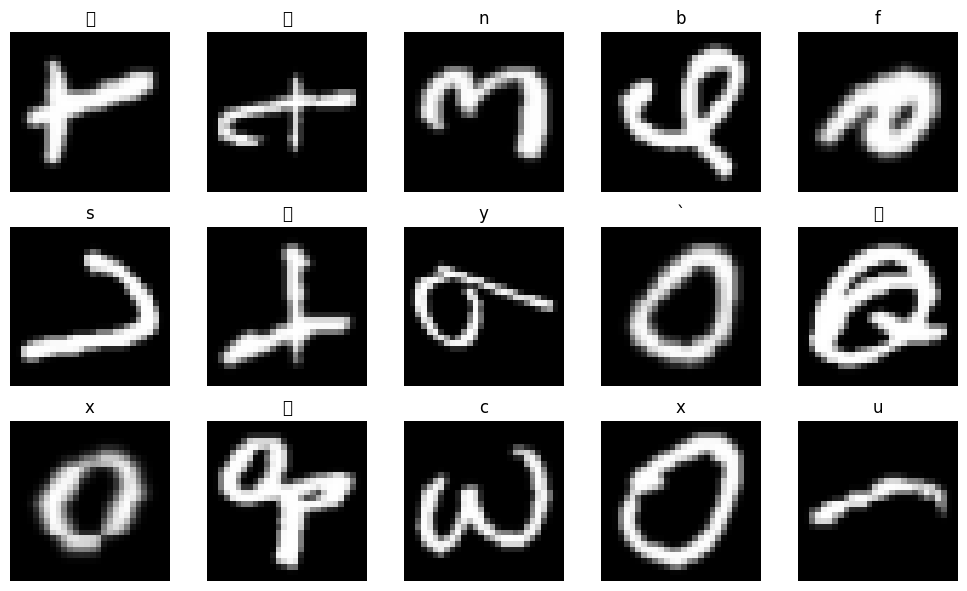

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

r, c = 3, 5
fig = plt.figure(figsize=(2 * c, 2 * r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r * c + _c + 1)
        ix = random.randint(0, len(test_dataset) - 1)
        img, label = test_dataset[ix]

        # Desnormalizar y mostrar la imagen
        img = img.numpy() * 0.5 + 0.5  # Deshacer la normalización
        plt.imshow(img[0], cmap='gray')  # EMNIST images have shape (1, 28, 28)
        plt.axis("off")
        plt.title(chr(label + 96))  # Convert label to ASCII character
plt.tight_layout()
plt.show()